In [6]:
import numpy as np
from qiskit import *
from qiskit import Aer
from qiskit.visualization import plot_histogram, plot_state_city,plot_circuit_layout
from qiskit.tools.monitor import job_monitor
%matplotlib inline

In [7]:
def BeamS(q,qr,c,cr,f):
    circ=QuantumCircuit(qr,cr)
    for i in range(q-1):
        circ.cx(0,i+1)
    circ.h(0)
    for i in range(q-1):
        circ.cx(0,i+1)
    circ=f+circ
    return circ

In [8]:
def measu(qr,cr,f):
    meas=QuantumCircuit(qr,cr)
    meas.barrier(qr[:])
    meas.measure(qr[:],cr[:])
    qc=f+meas
    return qc

In [9]:
#Create circuit
q=5
c=5
qr=QuantumRegister(q)
cr=ClassicalRegister(c)
SH=QuantumCircuit(qr,cr)
#initialize state
vec=np.zeros(2**q)
vec[(2**q)-1]=1  
SH.initialize(vec, [qr[:]])
#BeamSplitter
SH=BeamS(q,qr,c,cr,SH)
#measurements
SH_meas=measu(qr,cr,SH)

SH_meas.draw()

In [5]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(SH_meas, backend_sim, shots=1024)
result_sim=job_sim.result()
counts=result_sim.get_counts(SH_meas)
print(counts)

{'00000': 512, '11111': 512}


In [104]:
backend=Aer.get_backend('statevector_simulator')
job=execute(SH,backend)
result=job.result()
outputstate=result.get_statevector(SH,decimals=3)
print(outputstate)

[ 0.707+0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
  0.   +0.j -0.707+0.j]


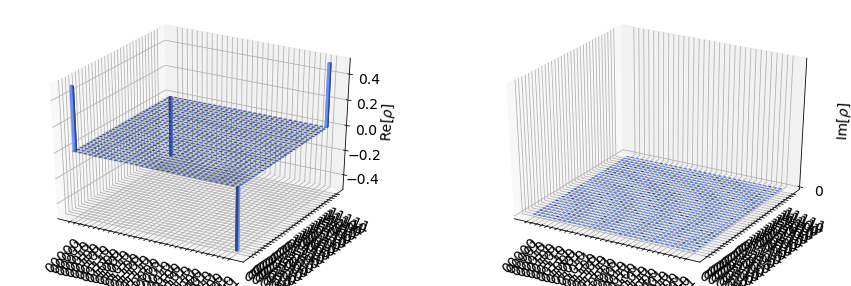

In [105]:
plot_state_city(outputstate)

In [106]:
from qiskit import IBMQ
#IBMQ.load_account()
provider = IBMQ.get_provider(group='open')
provider.backends()
backend_exp = provider.get_backend('ibmqx2')

/home/72marcoantonio/anaconda3/envs/qiskit-env/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:181: UserWarning: Credentials are already in use. The existing account in the session will be replaced.
  warnings.warn('Credentials are already in use. The existing '


Depth: 87
Depth: 198


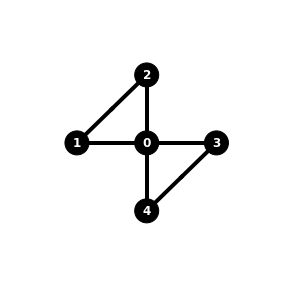

In [107]:
SH_meas_tp=transpile(SH_meas,backend=backend_exp,optimization_level=3, initial_layout=[2,0,1,3,4])
SH_meas=transpile(SH_meas,backend=backend_exp,optimization_level=0)
print('Depth:', SH_meas_tp.depth())
print('Depth:', SH_meas.depth())

plot_circuit_layout(SH_meas_tp, backend_exp)

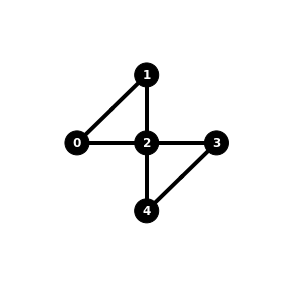

In [108]:
plot_circuit_layout(SH_meas, backend_exp)

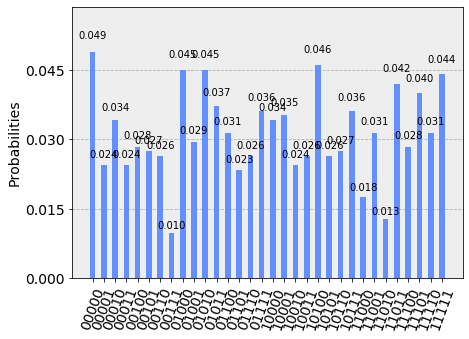

In [109]:
#Optimized
#job_exp = execute(SH_meas_tp, backend=backend_exp)
job_exp = backend_exp.retrieve_job('5dfbf0ea7d7188001173f1e0')
result_exp=job_exp.result()
counts=result_exp.get_counts()
plot_histogram(counts)

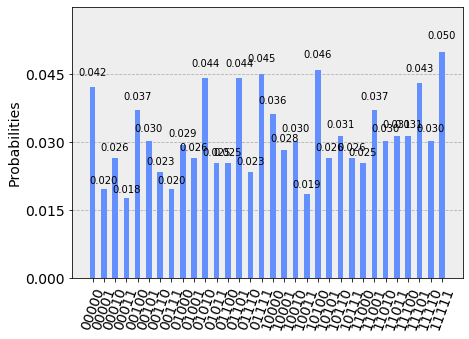

In [110]:
#Not Optimized
#job_exp = execute(SH_meas, backend=backend_exp)
job_exp = backend_exp.retrieve_job('5dfbf0ec4050410011bf441f')
result_exp=job_exp.result()
counts=result_exp.get_counts()
plot_histogram(counts)

In [113]:
#Create circuit
q=5
c=5
qr=QuantumRegister(q)
cr=ClassicalRegister(c)
SH=QuantumCircuit(qr,cr)
#initialize state
for i in range(q):
    SH.x(i)
#BeamSplitter
SH=BeamS(q,qr,c,cr,SH)
#measurements
SH_meas=measu(qr,cr,SH)

SH_meas.draw()

Depth: 11
Depth: 14


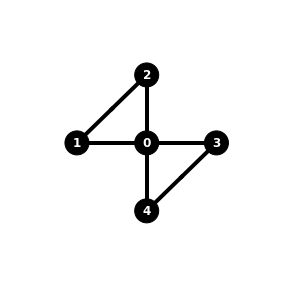

In [114]:
SH_meas_tp=transpile(SH_meas,backend=backend_exp,optimization_level=3, initial_layout=[2,0,1,3,4])
SH_meas=transpile(SH_meas,backend=backend_exp,optimization_level=0)
print('Depth:', SH_meas_tp.depth())
print('Depth:', SH_meas.depth())

plot_circuit_layout(SH_meas_tp, backend_exp)

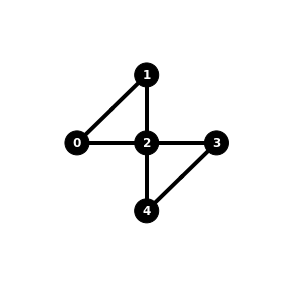

In [115]:
plot_circuit_layout(SH_meas, backend_exp)

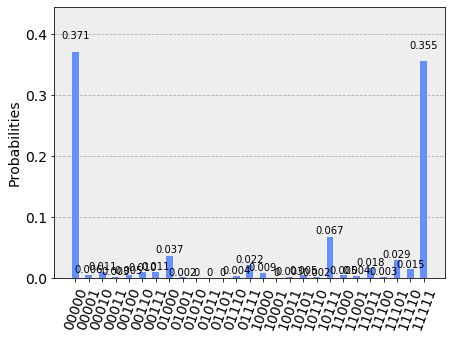

In [116]:
#Optimized
#job_exp = execute(SH_meas_tp, backend=backend_exp)
#job_exp.job_id()
job_exp = backend_exp.retrieve_job('5dfbf3649097ca0012c1a34d')
result_exp=job_exp.result()
counts=result_exp.get_counts()
plot_histogram(counts)

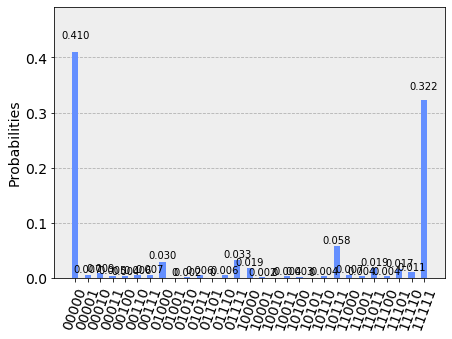

In [117]:
#Not Optimized
#job_exp = execute(SH_meas, backend=backend_exp)
#job_exp.job_id()
job_exp = backend_exp.retrieve_job('5dfbf36b4050410011bf443a')
result_exp=job_exp.result()
counts=result_exp.get_counts()
plot_histogram(counts)

In [118]:
job_monitor(job_exp)

Job Status: job has successfully run


In [120]:
job=execute(SH,backend)
result=job.result()
outputstate=result.get_statevector(SH,decimals=3)
print(outputstate)

[ 0.707+0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
  0.   +0.j -0.707+0.j]


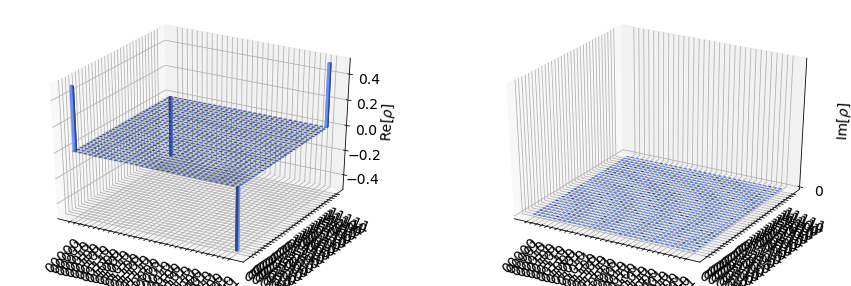

In [121]:
plot_state_city(outputstate)